# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [94]:
df = pd.read_csv('Classified Data', index_col=0)
df.tail()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [98]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))
# Checking the head ...
scaled_features[:5]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137,  0.75587279,  2.03169299,
        -0.87015616,  2.59981844,  0.28570652, -0.68249379, -0.37784986],
       [ 0.9828405 ,  1.06019327, -0.62139875,  0.62529938,  0.45282034,
        -0.26722041,  1.75020756,  1.06649052,  1.24132463, -1.02698711],
       [ 1.13927548, -0.64039191, -0.70981864, -0.05717457,  0.82288616,
        -0.93677314,  0.59678173, -1.47235164,  1.04077225,  0.2765098 ]])

In [99]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = df_feat
y = df['TARGET CLASS']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# n_neighbors is the number of neighbors you want.. , we will start will 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

In [105]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [106]:
prediction = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


**As we can see, with K=1 , it's pretty accurate, so now we're going to test with a greater K value**

___
## Choosing a K Value
___
Let's go ahead and use the elbow method to pick a good K Value:

In [109]:
error_rate = []

# setting the value of neighbors from 1 to 40
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
error_rate[:5] # checking the head of the list

[0.07666666666666666, 0.09, 0.05, 0.07, 0.056666666666666664]

Text(0, 0.5, 'Error rate')

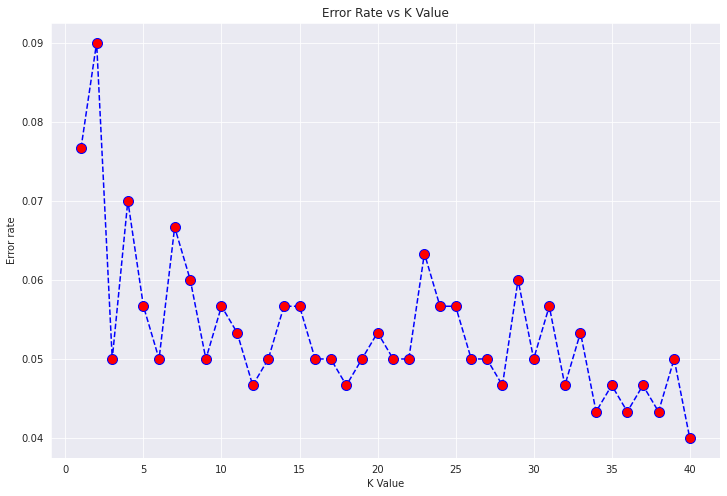

In [110]:
plt.figure(figsize=(12,8))
plt.plot(range(1,41),error_rate, color = 'blue', ls = '--', marker = 'o', markerfacecolor = 'red', ms = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [111]:
# Let's compare k=1 with k=19
# 1st k=1

knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



[[151   8]
 [ 15 126]]


In [112]:
# Now with K=19

knn = KNeighborsClassifier(n_neighbors= 19)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



[[153   6]
 [  9 132]]


# Awesome job !